<a href="https://colab.research.google.com/github/ChahineBA/British-Airways-Virtual-Internship/blob/main/Cutomer_Reviews_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Libries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [ ]:
# Base URL for the airline reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/"

# Starting page number
page = 1

# Number of reviews per page
page_size = 100

# List to store all reviews
all_reviews = []

# Loop to scrape multiple pages
while True:
    # Construct the URL for the current page
    page_url = f"{base_url}{page}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Send a GET request to the current page URL
    response = requests.get(page_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all review elements on the page
        reviews = soup.find_all("article", attrs={'itemprop': 'review'})

        # Print the page number being scraped for debugging
        print("Scraping page: " + str(page))

        # Add the reviews from the current page to the list
        all_reviews.extend(reviews)

        # Check if no reviews were found on the current page
        if not reviews:
            # If no reviews are found, we have reached the last page
            break

        # Move to the next page
        page += 1
    else:
        # Print an error message if the request failed
        print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
        break


Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40


In [ ]:
# Initialize the list to store review details
reviews = []

# Loop through each review and extract details
for review in all_reviews:
    # Extract the title
    title_element = review.find("h2", class_="text_header")
    title = title_element.text.strip() if title_element else "N/A"

    # Extract the author
    author_element = review.find("span", attrs={'itemprop': 'name'})
    author = author_element.text.strip() if author_element else "N/A"

    # Extract the time
    time_element = review.find("time", attrs={'itemprop': 'datePublished'})
    time = time_element.text.strip() if time_element else "N/A"

    # Extract the location
    h3_tag = review.find('h3', class_='text_sub_header userStatusWrapper')
    location = h3_tag.text.split(')')[0].split('(')[-1].strip() if h3_tag else "N/A"

    # Extract Verification
    review_body = review.find('div', attrs={'itemprop': 'reviewBody'})
    verified = review_body.find('em').text.strip() if review_body and review_body.find('em') else "Not Available"

    # Extract Description
    des_element = review.find('div', class_='text_content')
    description = des_element.text.strip() if des_element else "No Description"

    # Extract Overall Rating:
    rating_element = review.find('span',attrs={'itemprop': 'ratingValue'})
    rating = rating_element.text.strip() if rating_element else 'N/A'

    # Create a dictionary to store review details
    review_details = {
        "title": title,
        "author": author,
        "date": time,
        "location": location,
        "verified": verified,
        "description": description,
        "rating /10": rating
    }

    # Find all table rows <tr> (for star ratings and review values)
    rows = review.find_all('tr')

    # Loop through each row and extract the header, value, and star ratings
    for row in rows:
        header = row.find('td', class_='review-rating-header')

        # Try to find the value
        value = row.find('td', class_='review-value')

        # Try to find star ratings
        stars_container = row.find('td', class_='review-rating-stars')

        if header and value:  # If the row has a standard review value
            label = header.get_text(strip=True)
            data = value.get_text(strip=True)
            review_details[label] = data  # Store the value with the corresponding label

        elif header and stars_container:  # If the row contains star ratings
            label = header.get_text(strip=True)
            stars = stars_container.find_all('span', class_='star fill')
            num_stars = len(stars)  # Count filled stars
            review_details[label] = f"{num_stars} stars"  # Store the star rating with the label

    # Append the review details to the list
    reviews.append(review_details)

# Print the list of reviews
for review in reviews:
    print(review)
    print("-" * 40)  # Separator between reviews


Streaming output truncated to the last 5000 lines.
{'title': '"years have not been kind"', 'author': 'Neil Jeram', 'date': '25th May 2018', 'location': 'Australia', 'verified': 'Trip Verified', 'description': "✅ Trip Verified | Sydney to London via Singapore. It has been a very long time since I was on a long haul with BA of more than 9 hours. Last year had a relative sprint from London to JFK and before that in 2002. The years have not been kind to BA. Probably a mixture of the decline of BA and the emergence of other airlines. Nearly all my long haul is with Qantas on its A380, occasionally Emirates on its version and then once in a while with Cathay Pacific and American Airlines. The problem is not the hard product. A B777 or the A380 in whatever colour and decor is ordered is the same air frame. The B777 from Sydney to Singapore was fine. Nosier than the A380 but that is well known. Very comfortable seats and at 8 hours a relative sprint for those who call Sydney home. It is the so

In [ ]:
# Convert 'reviews' into a Pandas DataFrame
reviews = pd.DataFrame(reviews)

# Display the resulting DataFrame 'reviews'
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3856           British Airways customer review       J Tinning   
3857           British Airways customer review      Nick Berry   
3858           British Airways customer review   Avril Barclay   
3859           British Airways customer review          C Volz   
3860           British Airways customer review       Russ King   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3856     29th August 2012  United Kingdom  Not Available   
3857     28th August 2012  United Kingdom  Not Available   
3858    12th October 2011  United Kingdom  Not Available   
3859    11th October 2011   United States  Not Available   
3860     9th October 2011  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3856  Flew LHR - VIE return operated by bmi but BA a...         10   
3857  LHR to HAM. Purser addresses all club passenge...          9   
3858  My son who had worked for British Airways urge...          5   
3859  London City-New York JFK via Shannon on A318 b...          4   
3860  SIN-LHR BA12 B747-436 First Class. Old aircraf...          4   

     Type Of Traveller        Seat Type                               Route  \
0       Family Leisure    Economy Class  Amsterdam to Pittsburgh via London   
1       Couple Leisure    Economy Class                  Heathrow to Berlin   
2       Couple Leisure    Economy Class    Manchester to Seattle via London   
3       Couple Leisure   Business Class        London Heathrow to Nashville   
4       Couple Leisure    Economy Class                    London to Venice   
...                ...              ...                                 ...   
3856               NaN    Economy Class                                 NaN   
3857               NaN   Business Class                                 NaN   
3858               NaN    Economy Class                                 NaN   
3859               NaN  Premium Economy                                 NaN   
3860               NaN      First Class                                 NaN   

          Date Flown Seat Comfort Cabin Staff Service Food & Beverages  \
0     September 2024      2 stars             2 stars          2 stars   
1          July 2024      3 stars             4 stars          3 stars   
2           May 2024          NaN                 NaN              NaN   
3        August 2024      4 stars             4 stars          4 stars   
4     September 2024      2 stars             3 stars              NaN   
...              ...          ...                 ...              ...   
3856             NaN      5 stars             5 stars          5 stars   
3857             NaN      4 stars             5 stars          4 stars   
3858             NaN          NaN                 NaN              NaN 

In [ ]:
# Check for NaN values in each column and count them
nan_counts = reviews.isna().sum()

# Display the number of NaN values for each column
print(nan_counts)

title                        0
author                       0
date                         0
location                     0
verified                     0
description                  0
rating /10                   0
Type Of Traveller          771
Seat Type                    2
Route                      776
Date Flown                 778
Seat Comfort               125
Cabin Staff Service        139
Food & Beverages           425
Inflight Entertainment    1217
Ground Service             850
Wifi & Connectivity       3191
Value For Money              0
Recommended                  0
Aircraft                  1849
dtype: int64


**Conclusion**

The dataset contains 3861 rows, with varying amounts of missing values across different columns. Here’s a summary of the NaN values:

- **Columns with no missing values:**
  - `title`
  - `author`
  - `date`
  - `location`
  - `verified`
  - `description`
  - `rating /10`
  - `Value For Money`
  - `Recommended`

- **Columns with significant missing values:**
  - `Type Of Traveller`: 771 missing values
  - `Seat Type`: 2 missing values
  - `Route`: 776 missing values
  - `Date Flown`: 778 missing values
  - `Seat Comfort`: 125 missing values
  - `Cabin Staff Service`: 139 missing values
  - `Food & Beverages`: 425 missing values
  - `Inflight Entertainment`: 1217 missing values
  - `Ground Service`: 850 missing values
  - `Wifi & Connectivity`: 3191 missing values
  - `Aircraft`: 1849 missing values

The columns with the highest number of missing values are `Wifi & Connectivity` and `Aircraft`, which could significantly impact the analysis or modeling.


In [ ]:
# Drop the columns 'Wifi & Connectivity', 'Aircraft', and 'Inflight Entertainment' from the DataFrame 'reviews'
reviews = reviews.drop(['Wifi & Connectivity', 'Aircraft', 'Inflight Entertainment'], axis=1)

# Display the updated DataFrame to see the result after removing the columns
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3856           British Airways customer review       J Tinning   
3857           British Airways customer review      Nick Berry   
3858           British Airways customer review   Avril Barclay   
3859           British Airways customer review          C Volz   
3860           British Airways customer review       Russ King   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3856     29th August 2012  United Kingdom  Not Available   
3857     28th August 2012  United Kingdom  Not Available   
3858    12th October 2011  United Kingdom  Not Available   
3859    11th October 2011   United States  Not Available   
3860     9th October 2011  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3856  Flew LHR - VIE return operated by bmi but BA a...         10   
3857  LHR to HAM. Purser addresses all club passenge...          9   
3858  My son who had worked for British Airways urge...          5   
3859  London City-New York JFK via Shannon on A318 b...          4   
3860  SIN-LHR BA12 B747-436 First Class. Old aircraf...          4   

     Type Of Traveller        Seat Type                               Route  \
0       Family Leisure    Economy Class  Amsterdam to Pittsburgh via London   
1       Couple Leisure    Economy Class                  Heathrow to Berlin   
2       Couple Leisure    Economy Class    Manchester to Seattle via London   
3       Couple Leisure   Business Class        London Heathrow to Nashville   
4       Couple Leisure    Economy Class                    London to Venice   
...                ...              ...                                 ...   
3856               NaN    Economy Class                                 NaN   
3857               NaN   Business Class                                 NaN   
3858               NaN    Economy Class                                 NaN   
3859               NaN  Premium Economy                                 NaN   
3860               NaN      First Class                                 NaN   

          Date Flown Seat Comfort Cabin Staff Service Food & Beverages  \
0     September 2024      2 stars             2 stars          2 stars   
1          July 2024      3 stars             4 stars          3 stars   
2           May 2024          NaN                 NaN              NaN   
3        August 2024      4 stars             4 stars          4 stars   
4     September 2024      2 stars             3 stars              NaN   
...              ...          ...                 ...              ...   
3856             NaN      5 stars             5 stars          5 stars   
3857             NaN      4 stars             5 stars          4 stars   
3858             NaN          NaN                 NaN              NaN 

In [ ]:
# Drop rows where the 'Seat Type' column has missing values
reviews = reviews.dropna(subset=['Seat Type'])

# Display the updated DataFrame to see the result after removing the rows with missing 'Seat Type' values
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3856           British Airways customer review       J Tinning   
3857           British Airways customer review      Nick Berry   
3858           British Airways customer review   Avril Barclay   
3859           British Airways customer review          C Volz   
3860           British Airways customer review       Russ King   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3856     29th August 2012  United Kingdom  Not Available   
3857     28th August 2012  United Kingdom  Not Available   
3858    12th October 2011  United Kingdom  Not Available   
3859    11th October 2011   United States  Not Available   
3860     9th October 2011  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3856  Flew LHR - VIE return operated by bmi but BA a...         10   
3857  LHR to HAM. Purser addresses all club passenge...          9   
3858  My son who had worked for British Airways urge...          5   
3859  London City-New York JFK via Shannon on A318 b...          4   
3860  SIN-LHR BA12 B747-436 First Class. Old aircraf...          4   

     Type Of Traveller        Seat Type                               Route  \
0       Family Leisure    Economy Class  Amsterdam to Pittsburgh via London   
1       Couple Leisure    Economy Class                  Heathrow to Berlin   
2       Couple Leisure    Economy Class    Manchester to Seattle via London   
3       Couple Leisure   Business Class        London Heathrow to Nashville   
4       Couple Leisure    Economy Class                    London to Venice   
...                ...              ...                                 ...   
3856               NaN    Economy Class                                 NaN   
3857               NaN   Business Class                                 NaN   
3858               NaN    Economy Class                                 NaN   
3859               NaN  Premium Economy                                 NaN   
3860               NaN      First Class                                 NaN   

          Date Flown Seat Comfort Cabin Staff Service Food & Beverages  \
0     September 2024      2 stars             2 stars          2 stars   
1          July 2024      3 stars             4 stars          3 stars   
2           May 2024          NaN                 NaN              NaN   
3        August 2024      4 stars             4 stars          4 stars   
4     September 2024      2 stars             3 stars              NaN   
...              ...          ...                 ...              ...   
3856             NaN      5 stars             5 stars          5 stars   
3857             NaN      4 stars             5 stars          4 stars   
3858             NaN          NaN                 NaN              NaN 

In [ ]:
# Check for NaN values in each column and count them
nan_counts = reviews.isna().sum()

# Display the number of NaN values for each column
print(nan_counts)

title                    0
author                   0
date                     0
location                 0
verified                 0
description              0
rating /10               0
Type Of Traveller      770
Seat Type                0
Route                  775
Date Flown             777
Seat Comfort           125
Cabin Staff Service    139
Food & Beverages       425
Ground Service         849
Value For Money          0
Recommended              0
dtype: int64


In [ ]:
# Count the number of unique values in each column of the DataFrame
unique_counts = reviews.nunique()

# Display the count of unique values for each column
print(unique_counts)

title                  2832
author                 3027
date                   1941
location                 75
verified                  3
description            3851
rating /10               11
Type Of Traveller         4
Seat Type                 4
Route                  1610
Date Flown              122
Seat Comfort              5
Cabin Staff Service       5
Food & Beverages          6
Ground Service            5
Value For Money           6
Recommended               2
dtype: int64


In [ ]:
# Drop the columns 'Route' from the DataFrame 'reviews'
reviews = reviews.drop(['Route'], axis=1)

# Display the updated DataFrame to see the result after removing the columns
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3856           British Airways customer review       J Tinning   
3857           British Airways customer review      Nick Berry   
3858           British Airways customer review   Avril Barclay   
3859           British Airways customer review          C Volz   
3860           British Airways customer review       Russ King   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3856     29th August 2012  United Kingdom  Not Available   
3857     28th August 2012  United Kingdom  Not Available   
3858    12th October 2011  United Kingdom  Not Available   
3859    11th October 2011   United States  Not Available   
3860     9th October 2011  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3856  Flew LHR - VIE return operated by bmi but BA a...         10   
3857  LHR to HAM. Purser addresses all club passenge...          9   
3858  My son who had worked for British Airways urge...          5   
3859  London City-New York JFK via Shannon on A318 b...          4   
3860  SIN-LHR BA12 B747-436 First Class. Old aircraf...          4   

     Type Of Traveller        Seat Type      Date Flown Seat Comfort  \
0       Family Leisure    Economy Class  September 2024      2 stars   
1       Couple Leisure    Economy Class       July 2024      3 stars   
2       Couple Leisure    Economy Class        May 2024          NaN   
3       Couple Leisure   Business Class     August 2024      4 stars   
4       Couple Leisure    Economy Class  September 2024      2 stars   
...                ...              ...             ...          ...   
3856               NaN    Economy Class             NaN      5 stars   
3857               NaN   Business Class             NaN      4 stars   
3858               NaN    Economy Class             NaN          NaN   
3859               NaN  Premium Economy             NaN      1 stars   
3860               NaN      First Class             NaN      4 stars   

     Cabin Staff Service Food & Beverages Ground Service Value For Money  \
0                2 stars          2 stars        1 stars         1 stars   
1                4 stars          3 stars        4 stars         3 stars   
2                    NaN              NaN        1 stars         1 stars   
3                4 stars          4 stars        2 stars         3 stars   
4                3 stars              NaN        1 stars         1 stars   
...                  ...              ...            ...             ...   
3856             5 stars          5 stars            NaN         4 stars   
3857             5 stars          4 stars            NaN         3 stars   
3858                 NaN              NaN            NaN         4 stars   
3859             3 stars          5 stars            NaN     

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3859 entries, 0 to 3860
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                3859 non-null   object
 1   author               3859 non-null   object
 2   date                 3859 non-null   object
 3   location             3859 non-null   object
 4   verified             3859 non-null   object
 5   description          3859 non-null   object
 6   rating /10           3859 non-null   object
 7   Type Of Traveller    3089 non-null   object
 8   Seat Type            3859 non-null   object
 9   Date Flown           3082 non-null   object
 10  Seat Comfort         3734 non-null   object
 11  Cabin Staff Service  3720 non-null   object
 12  Food & Beverages     3434 non-null   object
 13  Ground Service       3010 non-null   object
 14  Value For Money      3859 non-null   object
 15  Recommended          3859 non-null   object
dtypes: object(1

In [ ]:
# Convert 'Date Flown' to datetime, assuming the format is 'Month Year'
reviews['Date Flown'] = pd.to_datetime(reviews['Date Flown'], format='%B %Y')

# Extract the month and year into separate columns
reviews['Month'] = reviews['Date Flown'].dt.month_name()
reviews['Year'] = reviews['Date Flown'].dt.year

# Display the updated DataFrame
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3856           British Airways customer review       J Tinning   
3857           British Airways customer review      Nick Berry   
3858           British Airways customer review   Avril Barclay   
3859           British Airways customer review          C Volz   
3860           British Airways customer review       Russ King   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3856     29th August 2012  United Kingdom  Not Available   
3857     28th August 2012  United Kingdom  Not Available   
3858    12th October 2011  United Kingdom  Not Available   
3859    11th October 2011   United States  Not Available   
3860     9th October 2011  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3856  Flew LHR - VIE return operated by bmi but BA a...         10   
3857  LHR to HAM. Purser addresses all club passenge...          9   
3858  My son who had worked for British Airways urge...          5   
3859  London City-New York JFK via Shannon on A318 b...          4   
3860  SIN-LHR BA12 B747-436 First Class. Old aircraf...          4   

     Type Of Traveller        Seat Type Date Flown Seat Comfort  \
0       Family Leisure    Economy Class 2024-09-01      2 stars   
1       Couple Leisure    Economy Class 2024-07-01      3 stars   
2       Couple Leisure    Economy Class 2024-05-01          NaN   
3       Couple Leisure   Business Class 2024-08-01      4 stars   
4       Couple Leisure    Economy Class 2024-09-01      2 stars   
...                ...              ...        ...          ...   
3856               NaN    Economy Class        NaT      5 stars   
3857               NaN   Business Class        NaT      4 stars   
3858               NaN    Economy Class        NaT          NaN   
3859               NaN  Premium Economy        NaT      1 stars   
3860               NaN      First Class        NaT      4 stars   

     Cabin Staff Service Food & Beverages Ground Service Value For Money  \
0                2 stars          2 stars        1 stars         1 stars   
1                4 stars          3 stars        4 stars         3 stars   
2                    NaN              NaN        1 stars         1 stars   
3                4 stars          4 stars        2 stars         3 stars   
4                3 stars              NaN        1 stars         1 stars   
...                  ...              ...            ...             ...   
3856             5 stars          5 stars            NaN         4 stars   
3857             5 stars          4 stars            NaN         3 stars   
3858                 NaN              NaN            NaN         4 stars   
3859             3 stars          5 stars            NaN         1 stars   
3860             5 stars          5 stars    

In [ ]:
# Count the number of unique values in each column of the DataFrame
unique_counts = reviews.nunique()

# Display the count of unique values for each column
print(unique_counts)

title                  2832
author                 3027
date                   1941
location                 75
verified                  3
description            3851
rating /10               11
Type Of Traveller         4
Seat Type                 4
Date Flown              122
Seat Comfort              5
Cabin Staff Service       5
Food & Beverages          6
Ground Service            5
Value For Money           6
Recommended               2
Month                    12
Year                     11
dtype: int64


In [ ]:
# Count the number of occurrences for each unique value in the 'Month' column
month_counts = reviews['Month'].value_counts()

# Count the number of occurrences for each unique value in the 'Year' column
year_counts = reviews['Year'].value_counts()

# Display the counts
print("Month Counts:")
print(month_counts)
print("\nYear Counts:")
print(year_counts)

Month Counts:
Month
September    291
October      288
August       286
November     272
June         271
March        259
December     259
July         255
May          245
January      229
April        223
February     204
Name: count, dtype: int64

Year Counts:
Year
2016.0    563
2017.0    560
2015.0    473
2018.0    338
2019.0    336
2023.0    277
2022.0    217
2024.0    122
2020.0     94
2021.0     93
2014.0      9
Name: count, dtype: int64


In [ ]:
# Drop the columns 'Route' from the DataFrame 'reviews'
reviews = reviews.drop(['Date Flown','Month'], axis=1)

# Display the updated DataFrame to see the result after removing the columns
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3856           British Airways customer review       J Tinning   
3857           British Airways customer review      Nick Berry   
3858           British Airways customer review   Avril Barclay   
3859           British Airways customer review          C Volz   
3860           British Airways customer review       Russ King   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3856     29th August 2012  United Kingdom  Not Available   
3857     28th August 2012  United Kingdom  Not Available   
3858    12th October 2011  United Kingdom  Not Available   
3859    11th October 2011   United States  Not Available   
3860     9th October 2011  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3856  Flew LHR - VIE return operated by bmi but BA a...         10   
3857  LHR to HAM. Purser addresses all club passenge...          9   
3858  My son who had worked for British Airways urge...          5   
3859  London City-New York JFK via Shannon on A318 b...          4   
3860  SIN-LHR BA12 B747-436 First Class. Old aircraf...          4   

     Type Of Traveller        Seat Type Seat Comfort Cabin Staff Service  \
0       Family Leisure    Economy Class      2 stars             2 stars   
1       Couple Leisure    Economy Class      3 stars             4 stars   
2       Couple Leisure    Economy Class          NaN                 NaN   
3       Couple Leisure   Business Class      4 stars             4 stars   
4       Couple Leisure    Economy Class      2 stars             3 stars   
...                ...              ...          ...                 ...   
3856               NaN    Economy Class      5 stars             5 stars   
3857               NaN   Business Class      4 stars             5 stars   
3858               NaN    Economy Class          NaN                 NaN   
3859               NaN  Premium Economy      1 stars             3 stars   
3860               NaN      First Class      4 stars             5 stars   

     Food & Beverages Ground Service Value For Money Recommended    Year  
0             2 stars        1 stars         1 stars          no  2024.0  
1             3 stars        4 stars         3 stars         yes  2024.0  
2                 NaN        1 stars         1 stars          no  2024.0  
3             4 stars        2 stars         3 stars         yes  2024.0  
4                 NaN        1 stars         1 stars          no  2024.0  
...               ...            ...             ...         ...     ...  
3856          5 stars            NaN         4 stars         yes     NaN  
3857          4 stars            NaN         3 stars         yes     NaN  
3858              NaN            NaN         4 stars         yes     NaN  
3859          5 stars  

In [ ]:
# Check for NaN values in each column and count them
nan_counts = reviews.isna().sum()

# Display the number of NaN values for each column
print(nan_counts)

title                    0
author                   0
date                     0
location                 0
verified                 0
description              0
rating /10               0
Type Of Traveller      770
Seat Type                0
Seat Comfort           125
Cabin Staff Service    139
Food & Beverages       425
Ground Service         849
Value For Money          0
Recommended              0
Year                   777
dtype: int64


In [ ]:
# Count the number of occurrences for each unique value in the 'Month' column
ser_counts = reviews['Ground Service'].value_counts()

# Count the number of occurrences for each unique value in the 'Year' column
tr_counts = reviews['Type Of Traveller'].value_counts()

# Display the counts

print(ser_counts)

print(tr_counts)

Ground Service
1 stars    942
4 stars    658
3 stars    585
5 stars    447
2 stars    378
Name: count, dtype: int64
Type Of Traveller
Couple Leisure    1048
Solo Leisure       944
Business           669
Family Leisure     428
Name: count, dtype: int64


In [ ]:
# Drop rows where 'Year', 'Ground Service' and 'Type Of Traveller' are NaN
reviews = reviews.dropna(subset=['Ground Service', 'Type Of Traveller','Year'], how='all')

In [ ]:
# Check for NaN values in each column and count them
nan_counts = reviews.isna().sum()

# Display the number of NaN values for each column
print(nan_counts)

title                    0
author                   0
date                     0
location                 0
verified                 0
description              0
rating /10               0
Type Of Traveller        3
Seat Type                0
Seat Comfort           124
Cabin Staff Service    138
Food & Beverages       424
Ground Service          82
Value For Money          0
Recommended              0
Year                    10
dtype: int64


In [ ]:
# Count the number of occurrences for each unique value in the 'Month' column
seat_counts = reviews['Seat Comfort'].value_counts()

# Count the number of occurrences for each unique value in the 'Year' column
cabin_counts = reviews['Cabin Staff Service'].value_counts()

food_counts = reviews['Food & Beverages'].value_counts()

# Display the counts
print("Seat Comfort:")
print(seat_counts)
print("\nCabin Staff Service:")
print(cabin_counts)
print(food_counts)

Seat Comfort:
Seat Comfort
1 stars    747
3 stars    722
4 stars    623
2 stars    518
5 stars    358
Name: count, dtype: int64

Cabin Staff Service:
Cabin Staff Service
5 stars    784
1 stars    625
4 stars    591
3 stars    528
2 stars    426
Name: count, dtype: int64
Food & Beverages
1 stars    877
3 stars    497
2 stars    472
4 stars    469
5 stars    353
Name: count, dtype: int64


In [ ]:
# List of specific columns to fill NaN values
columns_to_fill = ['Ground Service', 'Type Of Traveller','Year','Cabin Staff Service','Food & Beverages']

# Loop through the specified columns
for column in columns_to_fill:
    # Calculate the mode (most frequent value) of the column
    mode_value = reviews[column].mode()[0]
    # Fill NaN values in the column with the mode
    reviews[column] = reviews[column].fillna(mode_value)

<ipython-input-21-b99c8ef30e8d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews[column] = reviews[column].fillna(mode_value)


In [ ]:
# Specify the two values to fill NaN values
value1 = '1 stars'
value2 = '3 stars'

# Function to randomly choose between value1 and value2
def fill_randomly(row):
    if pd.isna(row):
        return np.random.choice([value1, value2])
    return row

# Apply the function to fill NaN values
reviews['Seat Comfort'] = reviews['Seat Comfort'].apply(fill_randomly)

<ipython-input-22-cf0e0613fdce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Seat Comfort'] = reviews['Seat Comfort'].apply(fill_randomly)


In [ ]:
# Check for NaN values in each column and count them
nan_counts = reviews.isna().sum()

# Display the number of NaN values for each column
print(nan_counts)

title                  0
author                 0
date                   0
location               0
verified               0
description            0
rating /10             0
Type Of Traveller      0
Seat Type              0
Seat Comfort           0
Cabin Staff Service    0
Food & Beverages       0
Ground Service         0
Value For Money        0
Recommended            0
Year                   0
dtype: int64


In [ ]:
reviews

title          author  \
0                          "very disappointed"   Thomas Wilson   
1               "happily recommend and use BA"  Stephen Cooper   
2     "cannot get compensation for our flight"    S Grimsditch   
3           “Crew very friendly and attentive”     Mark Simons   
4                        "A nightmare journey"          B Owen   
...                                        ...             ...   
3088           British Airways customer review          D Ross   
3089           British Airways customer review         J Brown   
3090           British Airways customer review  Kevin Barrance   
3091           British Airways customer review  Kevin Barrance   
3092           British Airways customer review      R Tompkins   

                     date        location       verified  \
0     13th September 2024   United States   Not Verified   
1     13th September 2024       Australia   Not Verified   
2     13th September 2024  United Kingdom   Not Verified   
3     11th September 2024  United Kingdom   Not Verified   
4      8th September 2024  United Kingdom   Not Verified   
...                   ...             ...            ...   
3088       11th June 2015  United Kingdom  Not Available   
3089       11th June 2015  United Kingdom  Not Available   
3090       11th June 2015  United Kingdom  Not Available   
3091       11th June 2015  United Kingdom  Not Available   
3092       11th June 2015  United Kingdom  Not Available   

                                            description rating /10  \
0     Not Verified |  My wife and I are very disappo...          1   
1     Not Verified |  We flew BA between Heathrow an...          8   
2     Not Verified |  Absolutely disgusted with BA. ...          1   
3     Not Verified | Took a trip to Nashville with m...          8   
4     Not Verified |  A nightmare journey courtesy o...          1   
...                                                 ...        ...   
3088  LHR to YVR return. Hard earned Avios points tr...          7   
3089  Club World from LHR-ORD. Busy flight on the ag...          5   
3090  This review refers to a return trip from India...          3   
3091  This review concerns LHR-BOM in Business Class...          7   
3092  Family of 3 - 747 out (upper deck) 777 back. F...          8   

     Type Of Traveller        Seat Type Seat Comfort Cabin Staff Service  \
0       Family Leisure    Economy Class      2 stars             2 stars   
1       Couple Leisure    Economy Class      3 stars             4 stars   
2       Couple Leisure    Economy Class      3 stars             5 stars   
3       Couple Leisure   Business Class      4 stars             4 stars   
4       Couple Leisure    Economy Class      2 stars             3 stars   
...                ...              ...          ...                 ...   
3088          Business   Business Class      4 stars             5 stars   
3089          Business   Business Class      4 stars             2 stars   
3090          Business  Premium Economy      4 stars             1 stars   
3091          Business   Business Class      2 stars             5 stars   
3092    Family Leisure   Business Class      4 stars             5 stars   

     Food & Beverages Ground Service Value For Money Recommended    Year  
0             2 stars        1 stars         1 stars          no  2024.0  
1             3 stars        4 stars         3 stars         yes  2024.0  
2             1 stars        1 stars         1 stars          no  2024.0  
3             4 stars        2 stars         3 stars         yes  2024.0  
4             1 stars        1 stars         1 stars          no  2024.0  
...               ...            ...             ...         ...     ...  
3088          4 stars        1 stars         5 stars         yes  2016.0  
3089          3 stars        1 stars         3 stars         yes  2016.0  
3090          1 stars        1 stars         3 stars          no  2016.0  
3091          2 stars  

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3092 entries, 0 to 3092
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3092 non-null   object 
 1   author               3092 non-null   object 
 2   date                 3092 non-null   object 
 3   location             3092 non-null   object 
 4   verified             3092 non-null   object 
 5   description          3092 non-null   object 
 6   rating /10           3092 non-null   object 
 7   Type Of Traveller    3092 non-null   object 
 8   Seat Type            3092 non-null   object 
 9   Seat Comfort         3092 non-null   object 
 10  Cabin Staff Service  3092 non-null   object 
 11  Food & Beverages     3092 non-null   object 
 12  Ground Service       3092 non-null   object 
 13  Value For Money      3092 non-null   object 
 14  Recommended          3092 non-null   object 
 15  Year                 3092 non-null   float6

In [ ]:
reviews['Year'] = reviews['Year'].astype(int)
reviews['rating /10'] = reviews['rating /10'].astype(int)

<ipython-input-26-02b289765d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Year'] = reviews['Year'].astype(int)
<ipython-input-26-02b289765d4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['rating /10'] = reviews['rating /10'].astype(int)


In [ ]:
# Calculate the average rating
average_rating = reviews['rating /10'].mean()  # Replace 'rating' with the name of your rating column

print(f"The average rating is {average_rating:.2f}/10")

The average rating is 4.39/10


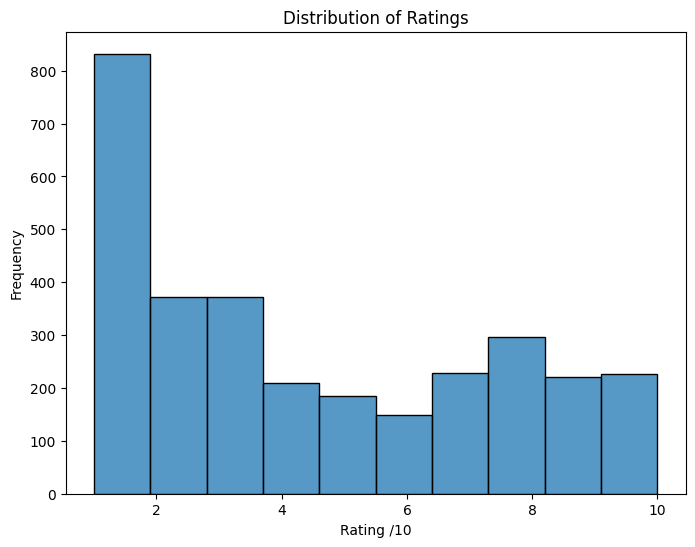

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(reviews['rating /10'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating /10')
plt.ylabel('Frequency')
# Save the plot as a PNG file
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Analysis of the Distribution of Ratings**

1. Skewed Distribution
- The rating distribution is skewed towards the lower end, with a large spike at a rating of **1/10**.
- Over **800** reviews gave a rating of 1, which might indicate significant dissatisfaction or negative experiences.

2. Relatively Even Spread Across Other Ratings
- Aside from the large spike at 1, the other ratings (from 2 to 10) are distributed more evenly, but no other rating comes close to the volume of 1.
- There are moderate counts for ratings **3**, **2**, and **8**, but they all pale in comparison to the number of reviews with a rating of 1.
- Ratings of **5** and **6** have relatively low counts compared to others.

3. Potential Outliers
- The outlier here is clearly the significant number of reviews with a rating of 1.
- This raises questions about the reasons behind the high number of very low ratings, such as severe service issues, a particular event that triggered dissatisfaction, or even possible anomalies in the data.

4. Moderate Satisfaction
- Ratings of **7**, **8**, and **10** also appear in the data but do not dominate the distribution.
- This could indicate that while some customers had positive experiences, they were fewer in number compared to those who were unhappy with their experience.

5. Summary
- The overall sentiment seems to lean towards negative, with most reviewers giving very low ratings (1/10).
- However, there are also pockets of moderate to high satisfaction, suggesting a more complex customer experience where some reviewers had good experiences while others had poor ones.
Next Steps
- Further investigation into what aspects of the service led to such low ratings (e.g., traveler type, seat type, location, etc.) could provide deeper insights into customer dissatisfaction.


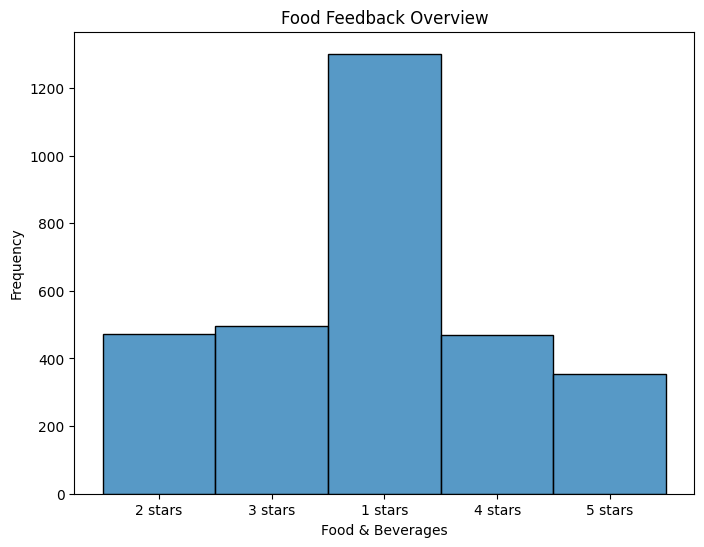

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(reviews['Food & Beverages'], bins=10, kde=False)
plt.title('Food Feedback Overview')
plt.xlabel('Food & Beverages')
plt.ylabel('Frequency')
# Save the plot as a PNG file
plt.savefig('food.png', dpi=300, bbox_inches='tight')
plt.show()

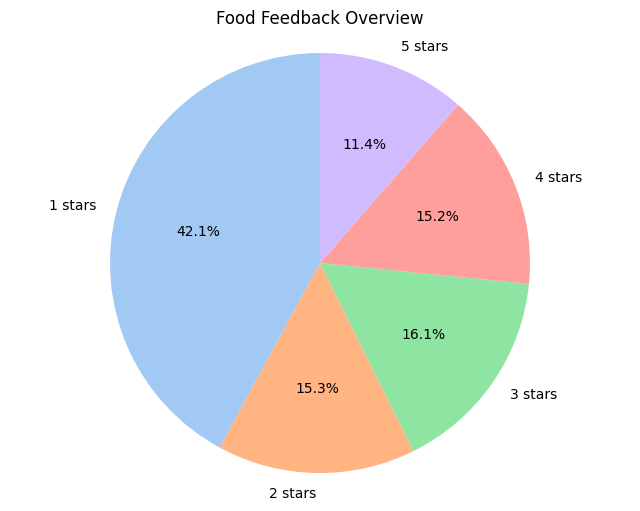

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'reviews' is a DataFrame and 'Food & Beverages' is a column with ratings
ratings = reviews['Food & Beverages'].value_counts().sort_index()

# Pie chart plot
plt.figure(figsize=(8, 6))
plt.pie(ratings, labels=ratings.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Food Feedback Overview')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Save the pie chart as a PNG file
plt.savefig('food_pie.png', dpi=300, bbox_inches='tight')
plt.show()

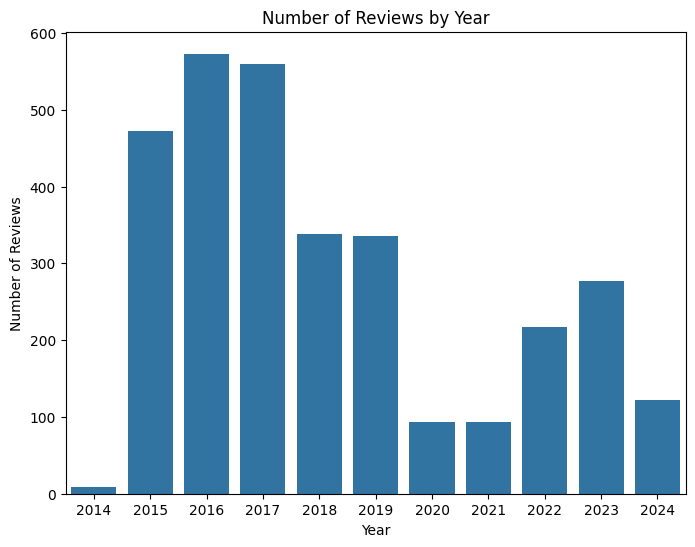

In [ ]:
# Count of reviews by Year
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=reviews)
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.savefig('reviews_per_year.png', dpi=300, bbox_inches='tight')
plt.show()

**Analysis of "Number of Reviews by Year" Bar Graph**

**Trend Overview**
- The number of reviews fluctuates over the years from 2014 to 2024.
- There are noticeable peaks and troughs, indicating varying levels of review activity.

**Significant Years**
- **2014**: The starting point with a moderate number of reviews.
- **2016**: A significant increase in reviews, reaching one of the higher points.
- **2018**: Another peak year with a high number of reviews.
- **2020**: A noticeable dip, possibly due to external factors affecting review activity.
- **2023**: The highest number of reviews, indicating a peak in review activity.

**Recent Trends**
- From 2021 to 2024, there is a general upward trend, with 2023 being the standout year.
- 2024 shows a slight decrease compared to 2023 but still maintains a high number of reviews.

**Possible Influences**
- External events, market changes, or internal factors within the organization could have influenced the fluctuations.
- The dip in 2020 might be related to global events such as the COVID-19 pandemic, which impacted many industries.


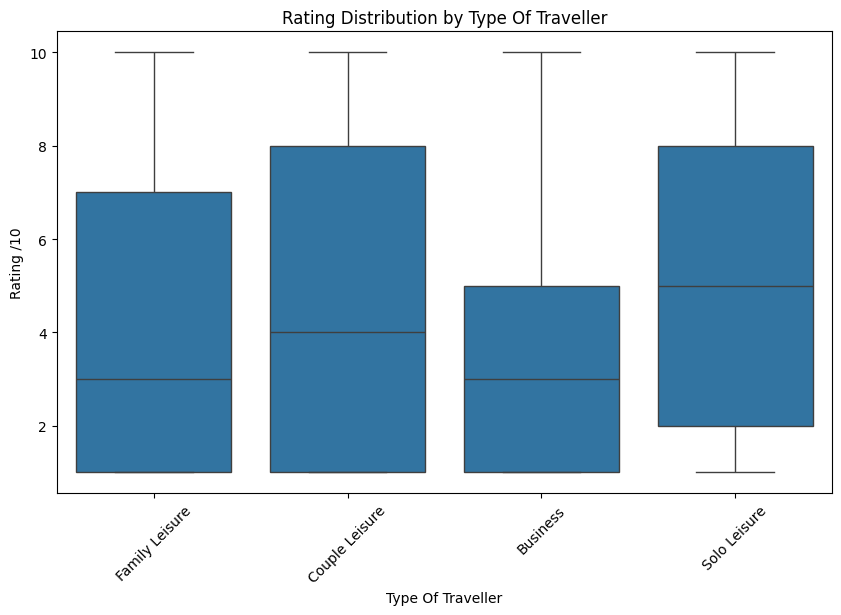

In [ ]:
# Average rating by Type Of Traveller
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type Of Traveller', y='rating /10', data=reviews)
plt.title('Rating Distribution by Type Of Traveller')
plt.xlabel('Type Of Traveller')
plt.ylabel('Rating /10')
plt.xticks(rotation=45)
plt.savefig('traveler.png', dpi=300, bbox_inches='tight')
plt.show()

# Analysis of "Rating Distribution by Type Of Traveller" Box Plot

## Overview
The box plot displays the rating distribution for different types of travelers: Family Leisure, Couple Leisure, Business, and Solo Leisure. The y-axis represents the rating on a scale from 1 to 5.

## Key Observations
- **Family Leisure**:
  - Median rating is around 4.
  - The interquartile range (IQR) is relatively narrow, indicating consistent ratings.
  - Whiskers show a few outliers, but most ratings are clustered around the median.

- **Couple Leisure**:
  - Median rating is slightly above 4.
  - The IQR is wider compared to Family Leisure, suggesting more variability in ratings.
  - Whiskers extend further, indicating a broader range of ratings.

- **Business**:
  - Median rating is around 3.5.
  - The IQR is narrow, similar to Family Leisure, indicating consistent ratings.
  - Whiskers show a few outliers, but the majority of ratings are close to the median.

- **Solo Leisure**:
  - Median rating is around 4.
  - The IQR is wider, similar to Couple Leisure, indicating more variability in ratings.
  - Whiskers extend further, showing a broader range of ratings.

## Insights
- **Consistency**: Family Leisure and Business travelers tend to have more consistent ratings, as indicated by their narrower IQRs.
- **Variability**: Couple Leisure and Solo Leisure travelers show more variability in their ratings, with wider IQRs and extended whiskers.
- **Overall Satisfaction**: Median ratings for all types of travelers are relatively high, with Family Leisure, Couple Leisure, and Solo Leisure having medians around 4, while Business travelers have a slightly lower median around 3.5.

## Conclusion
The box plot provides valuable insights into the rating distribution across different types of travelers. Understanding these patterns can help tailor services and improve customer satisfaction for each traveler segment.


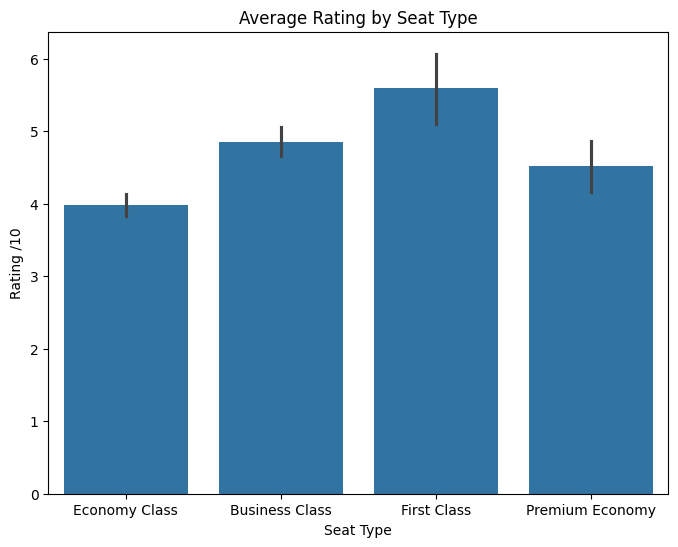

In [ ]:
# Average rating by Seat Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Seat Type', y='rating /10', data=reviews)
plt.title('Average Rating by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Rating /10')
plt.savefig('seats.png', dpi=300, bbox_inches='tight')
plt.show()

# Analysis of "Average Rating by Seat Type" Bar Chart

!Bar Chart titled 'Average Rating by Seat Type'

## Overview
The bar chart displays the average ratings for different seat types on an airline. The seat types include Economy Class, Business Class, First Class, and Premium Economy. The y-axis represents the rating on a scale from 0 to 10.

## Key Observations
- **Economy Class**:
  - The average rating is moderate, indicating a satisfactory experience for most passengers.
  - Error bars suggest some variability in the ratings.

- **Business Class**:
  - The average rating is higher than Economy Class, reflecting a better overall experience.
  - Error bars indicate a range of ratings, but the overall satisfaction is higher.

- **First Class**:
  - The highest average rating among all seat types, indicating a premium experience.
  - Error bars show some variability, but the ratings are generally very high.

- **Premium Economy**:
  - The average rating is similar to Economy Class, suggesting a comparable experience.
  - Error bars indicate variability, but the ratings are generally consistent.

## Insights
- **Overall Satisfaction**: First Class has the highest average rating, followed by Business Class, indicating that passengers in these classes generally have a better experience.
- **Variability**: Error bars show that there is some variability in the ratings for each seat type, with First Class having the least variability.
- **Comparison**: Economy Class and Premium Economy have similar average ratings, suggesting that passengers perceive these two classes similarly in terms of comfort and service.

## Conclusion
The bar chart provides a clear comparison of passenger satisfaction across different seat types. Understanding these ratings can help airlines improve services and tailor offerings to meet passenger expectations.


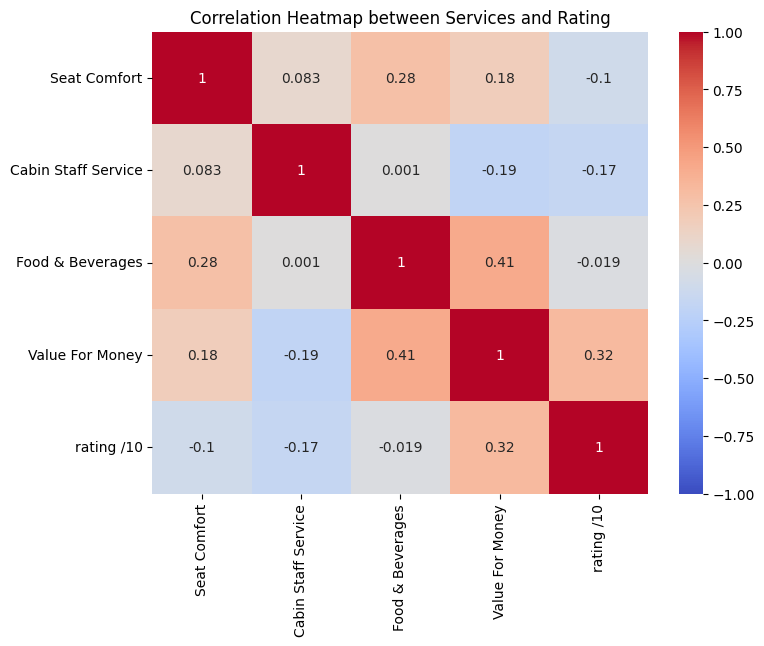

In [ ]:
# Correlation between Comfort and Rating
plt.figure(figsize=(8, 6))
correlation_data = reviews[['Seat Comfort', 'Cabin Staff Service','Food & Beverages','Value For Money','rating /10']].apply(lambda x: pd.factorize(x)[0])
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Services and Rating')
plt.savefig('Comfort.png', dpi=300, bbox_inches='tight')
plt.show()

# Analysis of "Correlation Heatmap between Comfort and Rating"

!Correlation Heatmap between Comfort and Rating

## Overview
The heatmap displays the correlation coefficients between various factors related to airline services and customer ratings out of 10. The color scale ranges from dark blue (representing -1.00) to dark red (representing 1.00), indicating the strength and direction of the correlations.

## Key Observations
- **Seat Comfort**:
  - Shows a moderate positive correlation with ratings (0.28).
  - Indicates that better seat comfort is associated with higher customer ratings.

- **Cabin Staff Service**:
  - Has a weak positive correlation with ratings (0.082).
  - Suggests that while good cabin staff service is appreciated, it is not a strong determinant of overall ratings.

- **Food & Beverages**:
  - Displays a moderate positive correlation with ratings (0.41).
  - Implies that the quality of food and beverages significantly impacts customer satisfaction.

- **Value for Money**:
  - Shows a moderate positive correlation with ratings (0.32).
  - Indicates that customers who perceive good value for money tend to give higher ratings.

## Insights
- **Strongest Correlation**: Food & Beverages has the highest positive correlation with customer ratings, suggesting it is a critical factor in passenger satisfaction.
- **Weakest Correlation**: Cabin Staff Service has the weakest positive correlation, indicating it has less impact on overall ratings compared to other factors.
- **Overall Trends**: All factors show positive correlations with customer ratings, meaning improvements in any of these areas are likely to enhance overall satisfaction.

## Conclusion
The heatmap provides valuable insights into the relationships between different aspects of airline service quality and customer satisfaction. Focusing on improving food and beverages, seat comfort, and value for money can lead to higher customer ratings.


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemma = WordNetLemmatizer()


reviews_data = reviews.description.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [ ]:
# add the corpus to the original dataframe
reviews['corpus'] = corpus

<ipython-input-70-6fbd05ddd890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['corpus'] = corpus


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example: assuming 'reviews' is a DataFrame with a column 'ReviewDescription' containing the review text
reviews['sentiment'] = reviews['corpus'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Add a sentiment label based on the score
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Add sentiment label column
reviews['sentiment_label'] = reviews['sentiment'].apply(label_sentiment)

# Display the first few rows with sentiment analysis
reviews[['description', 'sentiment', 'sentiment_label']]


<ipython-input-71-a037596169e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'] = reviews['corpus'].apply(lambda x: sia.polarity_scores(x)['compound'])
<ipython-input-71-a037596169e5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_label'] = reviews['sentiment'].apply(label_sentiment)


description  sentiment  \
0     Not Verified |  My wife and I are very disappo...    -0.7964   
1     Not Verified |  We flew BA between Heathrow an...     0.9856   
2     Not Verified |  Absolutely disgusted with BA. ...    -0.8268   
3     Not Verified | Took a trip to Nashville with m...     0.8655   
4     Not Verified |  A nightmare journey courtesy o...    -0.6486   
...                                                 ...        ...   
3088  LHR to YVR return. Hard earned Avios points tr...     0.9729   
3089  Club World from LHR-ORD. Busy flight on the ag...     0.8180   
3090  This review refers to a return trip from India...    -0.5141   
3091  This review concerns LHR-BOM in Business Class...     0.9571   
3092  Family of 3 - 747 out (upper deck) 777 back. F...     0.8906   

     sentiment_label  
0           Negative  
1           Positive  
2           Negative  
3           Positive  
4           Negative  
...              ...  
3088        Positive  
3089        Positive  
3090        Negative  
3091        Positive  
3092        Positive  

[3092 rows x 3 columns]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob
import pandas as pd

# Example: assuming 'reviews' is a DataFrame with a column 'ReviewDescription'
reviews['sentiment'] = reviews['corpus'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Add sentiment label based on polarity
def label_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add sentiment label column
reviews['sentiment_label'] = reviews['sentiment'].apply(label_sentiment)

# Display the first few rows with sentiment analysis
reviews[['description', 'sentiment', 'sentiment_label']]


<ipython-input-73-6f5a85f4f8bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'] = reviews['corpus'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-73-6f5a85f4f8bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_label'] = reviews['sentiment'].apply(label_sentiment)


description  sentiment  \
0     Not Verified |  My wife and I are very disappo...  -0.262500   
1     Not Verified |  We flew BA between Heathrow an...   0.176705   
2     Not Verified |  Absolutely disgusted with BA. ...  -0.381250   
3     Not Verified | Took a trip to Nashville with m...   0.085826   
4     Not Verified |  A nightmare journey courtesy o...  -0.200000   
...                                                 ...        ...   
3088  LHR to YVR return. Hard earned Avios points tr...   0.187931   
3089  Club World from LHR-ORD. Busy flight on the ag...   0.326042   
3090  This review refers to a return trip from India...  -0.043590   
3091  This review concerns LHR-BOM in Business Class...   0.219444   
3092  Family of 3 - 747 out (upper deck) 777 back. F...   0.088510   

     sentiment_label  
0           Negative  
1           Positive  
2           Negative  
3           Positive  
4           Negative  
...              ...  
3088        Positive  
3089        Positive  
3090        Negative  
3091        Positive  
3092        Positive  

[3092 rows x 3 columns]

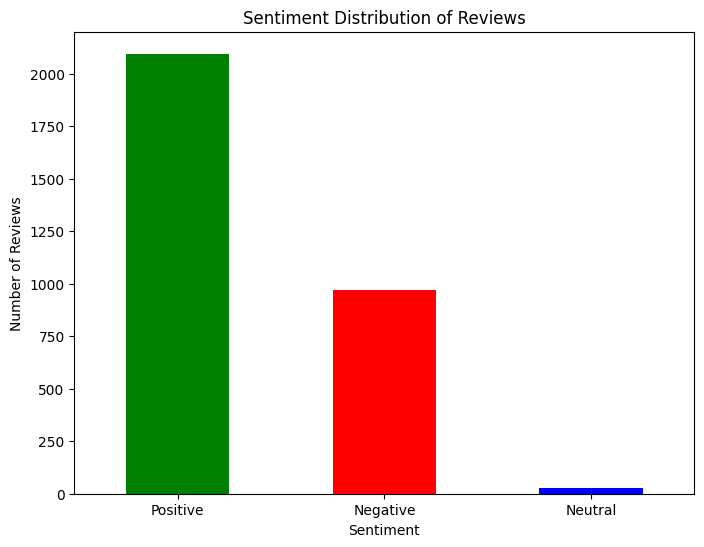

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral reviews
sentiment_counts = reviews['sentiment_label'].value_counts()

# Plot a bar graph for the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.savefig('sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = " ".join(reviews.corpus)

#split the text of all reviews into a list of words
words = words.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'class'),
  Text(6, 0, 'hour'),
  Text(7, 0, 'cabin'),
  Text(8, 0, 'good'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'customer'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'return'),
  Text(19, 0, 'bag')])

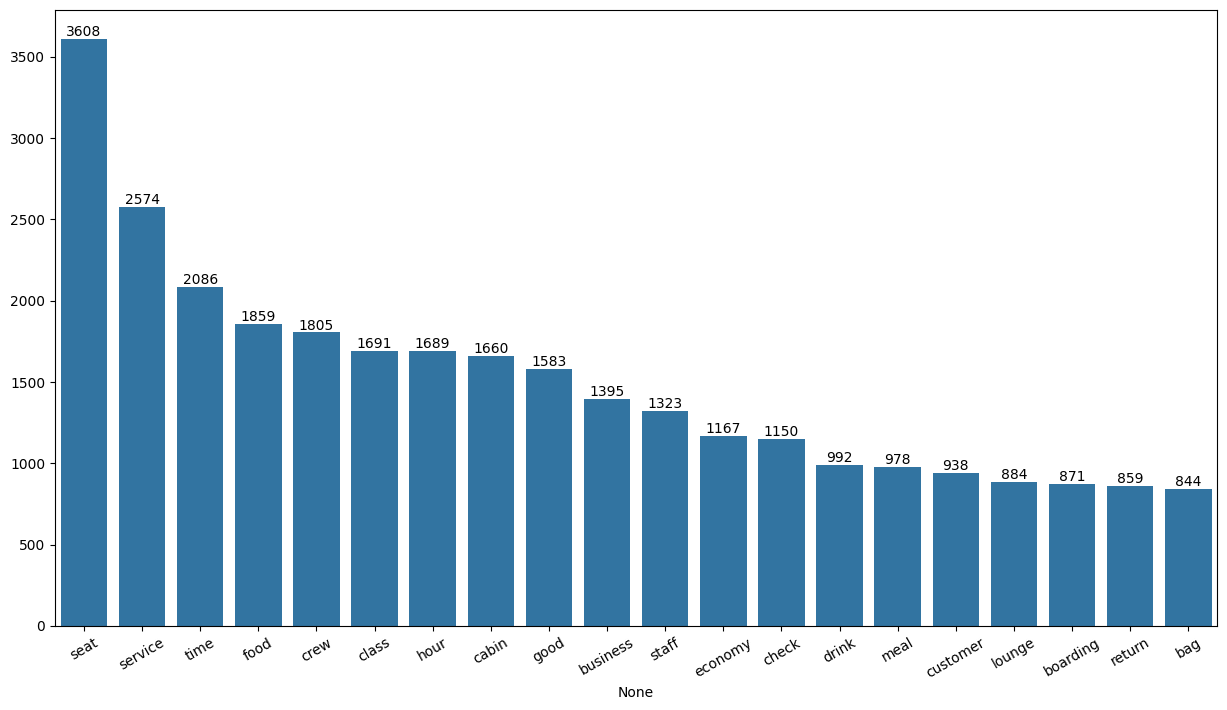

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

In [ ]:
# Export DataFrame to CSV
reviews.to_csv('reviews.csv', index=False)  # Set index=False to avoid writing row numbers

print("DataFrame exported to reviews.csv successfully!")

DataFrame exported to reviews.csv successfully!
